## Importing Flat Files from the Web

Data-driven workflows increasingly rely on accessing data hosted remotely—be it from public repositories, research archives, or internal web APIs. **Importing flat files directly from the web** is a foundational skill in data science, enabling fully reproducible and automated data pipelines. Python provides several robust, Pythonic tools for fetching, downloading, and reading files directly from URLs.

### Why Automate Web Downloads?

- **Reproducibility**: Manual downloads (via browser) are prone to error, inconsistency, and hinder automation.
- **Scalability**: Automated downloads scale to dozens, hundreds, or thousands of files across multiple runs.
- **Traceability**: Scripts document the data source, download logic, and processing steps—critical for scientific and production code.
- **Direct integration**: Data can flow directly into your codebase, without manual intervention.

### Key Tools for Web Downloads in Python

#### `urllib.request`

- Part of the standard library (`urllib`), so no extra installation needed.
- Provides low-level functions for fetching data across the web.
- `urlretrieve()` is a high-level utility for downloading files directly to disk.

##### Example: Downloading a CSV from the Web

```python
from urllib.request import urlretrieve

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
output_file = 'winequality-white.csv'

urlretrieve(url, output_file)
# Now 'winequality-white.csv' exists locally and is ready for reading by pandas, numpy, etc.
```

- The return value is a tuple: (local filename, HTTP response object).
- Use clear variable names for both the source URL and the destination filename for maintainability.

### Best Practices and Automation Patterns

- **Error Handling**: Always anticipate possible connection failures or bad URLs; wrap downloads in try/except blocks.
- **Idempotence**: Check if the file already exists before downloading to avoid redundant network calls.
- **Logging**: Track what was downloaded, from where, and when, for full reproducibility.
- **Integration**: Use with data import libraries like `pandas` to streamline subsequent analysis.
    ```python
    import pandas as pd
    df = pd.read_csv(output_file)
    ```

#### Example: Downloading and Reading in One Step

```python
from urllib.request import urlretrieve
import pandas as pd

url = "https://example.com/data.csv"
filename = "data.csv"
urlretrieve(url, filename)
df = pd.read_csv(filename)
```

### Other Approaches for Advanced Use Cases

- **`requests` library**: For more complex HTTP workflows (authentication, custom headers, streaming large files), use `requests.get()` and save content manually.
- **Direct read from URL with pandas**: `pd.read_csv(url)` will read many public CSV URLs directly into a DataFrame (no intermediate file).
- **Streaming and chunked downloads**: For extremely large files, download in chunks to save memory.

### Pythonic and Reproducible Data Science

Automating data acquisition from the web is central to **Pythonic, reproducible, and scalable data science**. Use standard libraries for simple use cases, and escalate to advanced libraries as the complexity of your requirements grows. Always document sources and manage data flow in code—never by manual download—if you intend your work to be repeatable and professional.
<br>
Importing flat files from the web with Python is a best practice for modern data projects. It streamlines data acquisition, guarantees reproducibility, and enables the automation of entire data science pipelines. Mastering tools like `urllib.request.urlretrieve` and integrating with downstream libraries is essential for any serious practitioner.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from pathlib import Path
import polars as pl
from pathlib import Path
import seaborn as sns

### Importing flat files from the web: your turn!
You are about to import your first file from the web! The flat file you will import will be `'winequality-red.csv'` from the University of California, Irvine's Machine Learning repository. The flat file contains tabular data of physiochemical properties of red wine, such as pH, alcohol content and citric acid content, along with wine quality rating.

The URL of the file is

`'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'`

After you import it, you'll check your working directory to confirm that it is there and then you'll load it into a pandas DataFrame.

In [2]:
# Import the function urlretrieve from the subpackage urllib.request.
from urllib.request import urlretrieve

# Assign the URL of the file to the variable url.
url = "https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv"

# Use the function urlretrieve() to save the file locally as 'winequality-red.csv'.
urlretrieve(url, "data/winequality-red.csv")

# Read file into a DataFrame and print its head
wine_quality = pd.read_csv("data/winequality-red.csv", sep=";")


display(wine_quality.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Opening and reading flat files from the web
You have just imported a file from the web, saved it locally and loaded it into a DataFrame. If you just wanted to load a file from the web into a DataFrame without first saving it locally, you can do that easily using `pandas`. In particular, you can use the function `pd.read_csv()` with the URL as the first argument and the separator sep as the second argument.

In [3]:
# Assign the URL of the file to the variable url.
url = "https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv"

# Read file into a DataFrame
wine_quality = pd.read_csv(url, sep=";")

# Print the head of the DataFrame
wine_quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


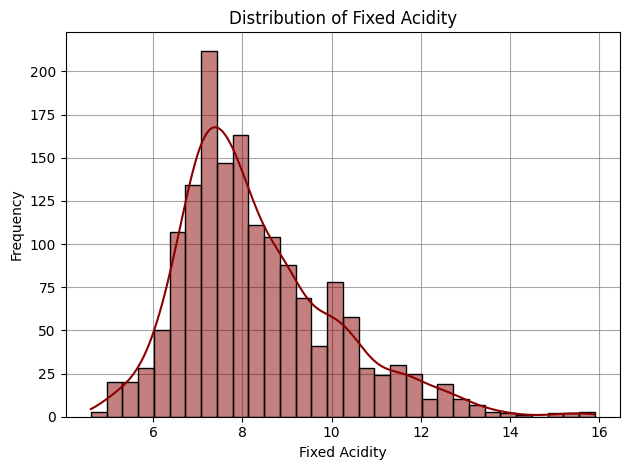

In [4]:
first_column_wine = wine_quality.iloc[:, 0]
# Plot first column of wine_quality
fig, ax = plt.subplots()

sns.histplot(x=first_column_wine, data=wine_quality, kde=True, color="darkred", ax=ax)

ax.grid(True, zorder=True, alpha=0.7, color="gray")
ax.set_axisbelow(True)

ax.set(xlabel="Fixed Acidity", ylabel="Frequency", title="Distribution of Fixed Acidity")

plt.tight_layout()
plt.show()

### Importing non-flat files from the web
In this interactive exercise, you'll use pd.read_excel() to import an Excel spreadsheet.

The URL of the spreadsheet is
`'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'`
Your job is to use `pd.read_excel()` to read in all of its sheets, print the sheet names and then print the head of the first sheet using its name, not its index.

Note that the output of `pd.read_excel()` is a Python dictionary with sheet names as keys and corresponding DataFrames as corresponding values.

In [5]:
# Assign the URL of the file to the variable url.
url = "https://assets.datacamp.com/course/importing_data_into_r/latitude.xls"

# Read the file in url into a dictionary xls using pd.read_excel() recalling that, in order to import all sheets you need to pass None to the argument sheet_name.
latitude = pd.read_excel(url, sheet_name=None)

# Print the names of the sheets in the Excel spreadsheet; these will be the keys of the dictionary xls.
print(latitude.keys())

dict_keys(['1700', '1900'])


In [6]:
# Print the head of the first sheet (using its name, NOT its index)
display(latitude["1700"])

,country,1700
0,Afghanistan,34.565000
1,Akrotiri and Dhekelia,34.616667
2,Albania,41.312000
3,Algeria,36.720000
4,American Samoa,-14.307000
...,...,...
241,"Yemen, Rep.",15.228000
242,Yugoslavia,NaN
243,Zambia,-12.942000
244,Zimbabwe,-17.876000


### Performing HTTP requests in Python using urllib
Now that you know the basics behind HTTP GET requests, it's time to perform some of your own. In this interactive exercise, you will ping our very own DataCamp servers to perform a GET request to extract information from the first coding exercise of this course, `"https://campus.datacamp.com/courses/1606/4135?ex=2"`.

In [7]:
# Import the functions urlopen and Request from the subpackage urllib.request.
from urllib.request import urlopen, Request

# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# Send the request and catch the response in the variable response with the function urlopen().
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Run the rest of the code to see the datatype of response and to close the connection!
print(type(response))

# Close the response!
response.close()

<class 'http.client.HTTPResponse'>


In [8]:
# Specify the url
url = "https://campus.datacamp.com/courses/1606/4135?ex=2"

# This packages the request
request = Request(url)

# Sends the request and catches the response: response
response = urlopen(request)

# Extract the response: html
html = response.read()

# Print the html
# print(html)

# Be polite and close the response!
response.close()

### Performing HTTP requests in Python using requests
Now that you've got your head and hands around making HTTP requests using the urllib package, you're going to figure out how to do the same using the higher-level requests library. You'll once again be pinging DataCamp servers for their `"http://www.datacamp.com/teach/documentation"` page.

Note that unlike in the previous exercises using urllib, you don't have to close the connection when using requests!

In [9]:
# Import the package requests.
import requests

# Assign the URL of interest to the variable url.
url = "http://www.datacamp.com/teach/documentation"

# Packages the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response: text
text = r.text

# Print the html
# print(text)

### Parsing HTML with BeautifulSoup
In this interactive exercise, you'll learn how to use the BeautifulSoup package to parse, prettify and extract information from HTML. You'll scrape the data from the webpage of Guido van Rossum, Python's very own **Benevolent Dictator for Life**. In the following exercises, you'll prettify the HTML and then extract the text and the hyperlinks.

The URL of interest is `url = 'https://www.python.org/~guido/'`.

In [10]:
# Import the function BeautifulSoup from the package bs4.
from bs4 import BeautifulSoup

# Assign the URL of interest to the variable url.
url = "https://www.python.org/~guido/"

# Package the request to the URL, send the request and catch the response with a single function requests.get(), assigning the response to the variable r.
r = requests.get(url)

# Use the text attribute of the object r to return the HTML of the webpage as a string; store the result in a variable html_doc.
html_doc = r.text

# Create a BeautifulSoup object soup from the resulting HTML using the function BeautifulSoup().
soup = BeautifulSoup(html_doc)

# Use the method prettify() on soup and assign the result to pretty_soup.
pretty_soup = soup.prettify()

# Print the response
print(pretty_soup)

<html>
 <head>
  <title>
   Guido's Personal Home Page
  </title>
 </head>
 <body bgcolor="#FFFFFF" text="#000000">
  <!-- Built from main -->
  <h1>
   <a href="pics.html">
    <img border="0" src="images/IMG_2192.jpg"/>
   </a>
   Guido van Rossum - Personal Home Page
   <a href="pics.html">
    <img border="0" height="216" src="images/guido-headshot-2019.jpg" width="270"/>
   </a>
  </h1>
  <p>
   <a href="http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm">
    <i>
     "Gawky and proud of it."
    </i>
   </a>
   <h3>
    <a href="images/df20000406.jpg">
     Who I Am
    </a>
   </h3>
   <p>
    Read
my
    <a href="http://neopythonic.blogspot.com/2016/04/kings-day-speech.html">
     "King's
Day Speech"
    </a>
    for some inspiration.
    <p>
     I am the author of the
     <a href="http://www.python.org">
      Python
     </a>
     programming language.  See also my
     <a href="Resume.html">
      resume
     </a>
     and my
 

### Turning a webpage into data using BeautifulSoup: getting the text
As promised, in the following exercises, you'll learn the basics of extracting information from HTML soup. In this exercise, you'll figure out how to extract the text from the BDFL's webpage, along with printing the webpage's title.

In [11]:
# Extract the title from the HTML soup soup using the attribute title and assign the result to guido_title.
guido_title = soup.title

# Print the title of Guido's webpage to the shell using the print() function.
print(guido_title)

<title>Guido's Personal Home Page</title>


In [12]:
# Extract the text from the HTML soup soup using the method get_text() and assign to guido_text.
guido_text = soup.get_text()

# Print Guido's text to the shell
print(guido_text)



Guido's Personal Home Page





Guido van Rossum - Personal Home Page


"Gawky and proud of it."
Who I Am
Read
my "King's
Day Speech" for some inspiration.

I am the author of the Python
programming language.  See also my resume
and my publications list, a brief bio, assorted writings, presentations and interviews (all about Python), some
pictures of me,
my new blog, and
my old
blog on Artima.com.  I am
@gvanrossum on Twitter.

I am currently a Distinguished Engineer at Microsoft.
I have worked for Dropbox, Google, Elemental Security, Zope
Corporation, BeOpen.com, CNRI, CWI, and SARA.  (See
my resume.)  I created Python while at CWI.

How to Reach Me
You can send email for me to guido (at) python.org.
I read everything sent there, but I receive too much email to respond
to everything.

Please understand that I do not give talks or keynotes any more,
nor do I participate in podcasts or give interviews, etc.
I am sorry, but I just receive too many such requests to decline
them individu

### Turning a webpage into data using BeautifulSoup: getting the hyperlinks
In this exercise, you'll figure out how to extract the URLs of the hyperlinks from the BDFL's webpage. In the process, you'll become close friends with the soup method `find_all()`.

In [13]:
# Use the method find_all() to find all hyperlinks in soup, remembering that hyperlinks are defined by the HTML tag <a> but passed to find_all() without angle brackets; store the result in the variable a_tags.
a_tags = soup.find_all("a")

# The variable a_tags is a results set: your job now is to enumerate over it, using a for loop and to print the actual URLs of the hyperlinks; to do this, for every element link in a_tags, you want to print() link.get('href').
for link in a_tags:
    print(link.get("href"))

pics.html
pics.html
http://www.washingtonpost.com/wp-srv/business/longterm/microsoft/stories/1998/raymond120398.htm
images/df20000406.jpg
http://neopythonic.blogspot.com/2016/04/kings-day-speech.html
http://www.python.org
Resume.html
Publications.html
bio.html
http://legacy.python.org/doc/essays/
http://legacy.python.org/doc/essays/ppt/
interviews.html
pics.html
http://neopythonic.blogspot.com
http://www.artima.com/weblogs/index.jsp?blogger=12088
https://twitter.com/gvanrossum
Resume.html
https://docs.python.org
https://github.com/python/cpython/issues
https://discuss.python.org
guido.au
http://legacy.python.org/doc/essays/
images/license.jpg
https://web.archive.org/
https://web.archive.org/web/20230627131911/http://www.cnpbagwell.com/audio-faq
http://sox.sourceforge.net/
images/internetdog.gif


### Loading and exploring a JSON
Here, we'll load the JSON `'a_movie.json'` into the variable `json_data`, which will be a dictionary. WE'll then explore the JSON contents by printing the key-value pairs of json_data to the shell.

In [14]:
# Import the package
import json

# Load the JSON 'a_movie.json' into the variable json_data within the context provided by the with statement. To do so, use the function json.load() within the context manager.
with open("data/a_movie.json", "r") as json_file:
    json_data = json.load(json_file)

# Print each key-value pair in json_data
for key, value in json_data.items():
    print(f"{key} : {value}")

Title : The Social Network
Year : 2010
Rated : PG-13
Released : 01 Oct 2010
Runtime : 120 min
Genre : Biography, Drama
Director : David Fincher
Writer : Aaron Sorkin, Ben Mezrich
Actors : Jesse Eisenberg, Andrew Garfield, Justin Timberlake
Plot : As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea and by the co-founder who was later squeezed out of the business.
Language : English, French
Country : United States
Awards : Won 3 Oscars. 174 wins & 188 nominations total
Poster : https://m.media-amazon.com/images/M/MV5BMjlkNTE5ZTUtNGEwNy00MGVhLThmZjMtZjU1NDE5Zjk1NDZkXkEyXkFqcGc@._V1_SX300.jpg
Ratings : [{'Source': 'Internet Movie Database', 'Value': '7.8/10'}, {'Source': 'Rotten Tomatoes', 'Value': '96%'}, {'Source': 'Metacritic', 'Value': '95/100'}]
Metascore : 95
imdbRating : 7.8
imdbVotes : 792,923
imdbID : tt1285016
Type : movie
DVD : N/A
BoxOffice : $96,962,694
Production : N